## Project non-payment probability

### Objective:
- The objective of this work is to train a classification model that can inform us of the probability of default occurring on a financial loan.

- O objetivo desse trabalho é treinar um modelo de classificação que possa nos informar qual a probabilidade de inadimplência ocorrer em um empréstimo financeiro.

### Data Origin:
- Dataset: https://www.kaggle.com/datasets/itssuru/loan-data

- publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

- Dados disponíveis publicamente do LendingClub.com. O Lending Club conecta pessoas que precisam de dinheiro (tomadores de empréstimo) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostrassem um perfil de ter uma alta probabilidade de pagar você de volta.

- Aqui está o que as colunas representam:

    credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito do LendingClub.com e 0 caso contrário.

    purpose: O propósito do empréstimo (assume os valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" e "all_other").

    int.rate: A taxa de juros do empréstimo, como uma proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários considerados pelo LendingClub.com como mais arriscados recebem taxas de juros mais altas.

    installment: As parcelas mensais devidas pelo mutuário se o empréstimo for financiado.

    log.annual.inc: O logaritmo natural da renda anual autodeclarada do mutuário.

    dti: A relação dívida/renda do mutuário (valor da dívida dividido pela renda anual).

    fico: A pontuação de crédito FICO do mutuário.

    days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.

    revol.bal: Saldo rotativo do mutuário (valor não pago no final do ciclo de cobrança do cartão de crédito).

    revol.util: Taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).

    inq.last.6mths: Número de consultas do mutuário por credores nos últimos 6 meses.

    delinq.2yrs: Número de vezes que o mutuário atrasou um pagamento em mais de 30 dias nos últimos 2 anos.

    pub.rec: Número de registros públicos depreciativos do mutuário (declarações de falência, penhoras fiscais ou julgamentos).

    not.fully.paid: O empréstimo não foi totalmente pago.

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [262]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [263]:
# métricas de verificação
from scipy.stats import skew # verifica se a base do sino da distribuição normal está entre -2 e 2 que é o limite viável
from scipy.stats import kurtosis # verifica se o cume do sino da distribuição normal está entre -2 e 2 (limite viável)

In [264]:
# preparação e visualização de dados
from sklearn.preprocessing import StandardScaler 
                    # faz a padronização dos dados para melhorar a normalidade (média=0 e variância=1)
                    # sensível a outliers

from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from fc import fc_retira_outliers as rto # função que retira outliers

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib
import numpy as np # computaçaõ de matrizes

In [265]:
# carregando arquivo de dados de cotações financeiras
df_emprestimo = pd.read_csv('dataset/loan_data.csv', sep=',')

In [266]:
df_emprestimo.shape

(9578, 14)

In [267]:
df_emprestimo.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [268]:
# reconhecendo as variáveis disponíveis
# verificando se há dados nulos
df_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [269]:
# confirmando a inexistência de nulos
df_emprestimo.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [270]:
# renomeando as colunas para facilitar o trabalho
df_emprestimo.columns = ['atende_criterios', 'utilizacao', 'tx_juros', 'vr_parcelas', 'log_renda_anual', \
                         'idx_div_renda', 'pont_mutuario', 'dias_credito', 'saldo_rotativo', 'tx_util_credito', \
                         'consult_mutuario_cred', 'nro_atraso', 'nro_reg_deprec', 'devedor']

In [271]:
df_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atende_criterios       9578 non-null   int64  
 1   utilizacao             9578 non-null   object 
 2   tx_juros               9578 non-null   float64
 3   vr_parcelas            9578 non-null   float64
 4   log_renda_anual        9578 non-null   float64
 5   idx_div_renda          9578 non-null   float64
 6   pont_mutuario          9578 non-null   int64  
 7   dias_credito           9578 non-null   float64
 8   saldo_rotativo         9578 non-null   int64  
 9   tx_util_credito        9578 non-null   float64
 10  consult_mutuario_cred  9578 non-null   int64  
 11  nro_atraso             9578 non-null   int64  
 12  nro_reg_deprec         9578 non-null   int64  
 13  devedor                9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB

In [272]:
df_emprestimo.head(10)

,atende_criterios,utilizacao,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,dias_credito,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_atraso,nro_reg_deprec,devedor
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [273]:
df_emprestimo['tx_juros'] = round(df_emprestimo['tx_juros'], 2)
df_emprestimo['log_renda_anual'] = round(df_emprestimo['log_renda_anual'], 0)
df_emprestimo['idx_div_renda'] = round(df_emprestimo['idx_div_renda'], 0)

In [274]:
df_emprestimo.tx_juros[df_emprestimo['tx_juros'].isin([0.19, 0.20, 0.21, 0.22])] = 0.18
df_emprestimo.tx_juros[df_emprestimo['tx_juros'].isin([0.06])] = 0.07

df_emprestimo.log_renda_anual[df_emprestimo['log_renda_anual'].isin([13, 14, 15])] = 12
df_emprestimo.log_renda_anual[df_emprestimo['log_renda_anual'].isin([8, 9])] = 10

df_emprestimo.idx_div_renda[df_emprestimo['idx_div_renda'] > 25] = 25

df_emprestimo.consult_mutuario_cred[df_emprestimo['consult_mutuario_cred'] > 8] = 8

df_emprestimo.nro_atraso[df_emprestimo['nro_atraso'] > 3] = 3

df_emprestimo.nro_reg_deprec[df_emprestimo['nro_reg_deprec'] > 2] = 2

In [275]:
print(df_emprestimo.atende_criterios.value_counts())
print('')
print(df_emprestimo.utilizacao.value_counts())
print('')
print(df_emprestimo.tx_juros.value_counts())
print('')
print(df_emprestimo.log_renda_anual.value_counts())
print('')
print(df_emprestimo.idx_div_renda.value_counts())
print('')
print(df_emprestimo.consult_mutuario_cred.value_counts())
print('')
print(df_emprestimo.nro_atraso.value_counts())
print('')
print(df_emprestimo.nro_reg_deprec.value_counts())
print('')
print(df_emprestimo.devedor.value_counts())

atende_criterios
1    7710
0    1868
Name: count, dtype: int64

utilizacao
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

tx_juros
0.13    1618
0.12    1290
0.11    1181
0.14    1174
0.09     875
0.15     818
0.10     685
0.08     677
0.16     512
0.18     294
0.17     236
0.07     218
Name: count, dtype: int64

log_renda_anual
11.0    5904
10.0    2150
12.0    1524
Name: count, dtype: int64

idx_div_renda
14.0    489
15.0    486
10.0    473
9.0     458
11.0    448
16.0    445
12.0    439
13.0    430
18.0    416
17.0    408
8.0     391
7.0     389
19.0    369
20.0    362
6.0     356
22.0    350
5.0     327
4.0     319
21.0    317
3.0     299
1.0     294
2.0     284
25.0    276
23.0    268
0.0     243
24.0    242
Name: count, dtype: int64

consult_mutuario_cred
0    3637
1    2462
2    1384
3     864
4     475
5     278


In [276]:
# lista a relação de colunas
list(df_emprestimo.columns)

['atende_criterios',
 'utilizacao',
 'tx_juros',
 'vr_parcelas',
 'log_renda_anual',
 'idx_div_renda',
 'pont_mutuario',
 'dias_credito',
 'saldo_rotativo',
 'tx_util_credito',
 'consult_mutuario_cred',
 'nro_atraso',
 'nro_reg_deprec',
 'devedor']

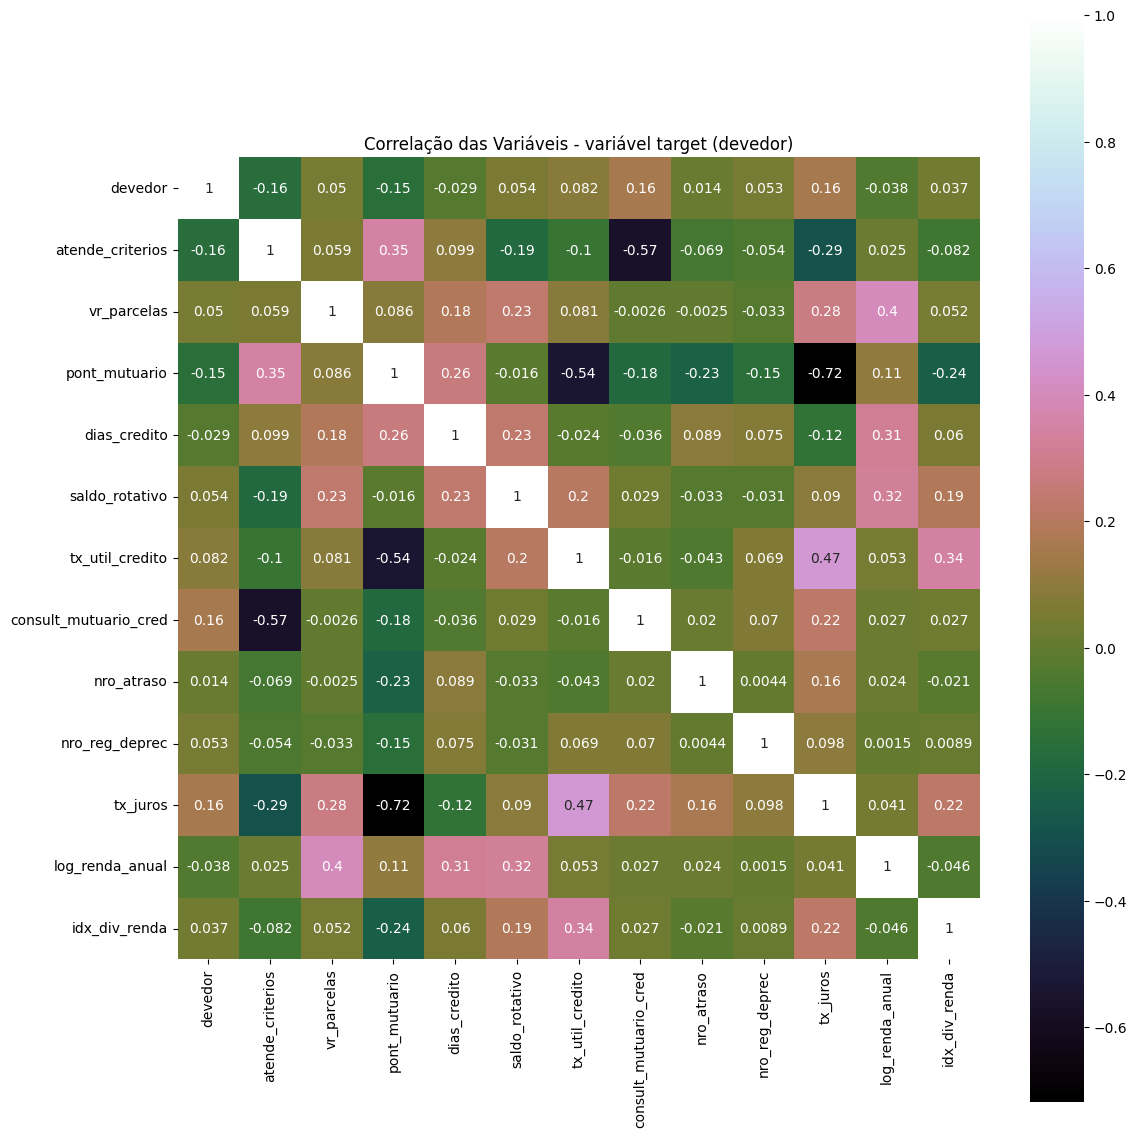

In [277]:
# analisando a correlação entre as variáveis
lista_corr = list(['devedor', 'atende_criterios',
                        #'utilizacao',
                        'vr_parcelas',
                        'pont_mutuario',
                        'dias_credito',
                        'saldo_rotativo',
                        'tx_util_credito',
                        'consult_mutuario_cred',
                        'nro_atraso',
                        'nro_reg_deprec',
                        'tx_juros',
                        'log_renda_anual',
                        'idx_div_renda'])

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(12,12))

correlation = df_emprestimo[lista_corr].corr()
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix', ax=axs)

axs.set_title('Correlação das Variáveis - variável target (devedor)')
fig.tight_layout()

pyplot.show()

In [278]:
lista_corr[1:]

['atende_criterios',
 'vr_parcelas',
 'pont_mutuario',
 'dias_credito',
 'saldo_rotativo',
 'tx_util_credito',
 'consult_mutuario_cred',
 'nro_atraso',
 'nro_reg_deprec',
 'tx_juros',
 'log_renda_anual',
 'idx_div_renda']

In [279]:
# criando uma lista das colunas com menos de 0.03 (3%) de correlação
correlation = df_emprestimo[lista_corr[:]].corr()
correlation_devedor = abs(correlation['devedor'])
drop_list_corr = sorted(list(correlation_devedor[correlation_devedor < 0.0300].index))
print(drop_list_corr)

['dias_credito', 'nro_atraso']


In [280]:
# verificando as colunas do df antes da exclusão
df_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atende_criterios       9578 non-null   int64  
 1   utilizacao             9578 non-null   object 
 2   tx_juros               9578 non-null   float64
 3   vr_parcelas            9578 non-null   float64
 4   log_renda_anual        9578 non-null   float64
 5   idx_div_renda          9578 non-null   float64
 6   pont_mutuario          9578 non-null   int64  
 7   dias_credito           9578 non-null   float64
 8   saldo_rotativo         9578 non-null   int64  
 9   tx_util_credito        9578 non-null   float64
 10  consult_mutuario_cred  9578 non-null   int64  
 11  nro_atraso             9578 non-null   int64  
 12  nro_reg_deprec         9578 non-null   int64  
 13  devedor                9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB

In [281]:
# apagando colunas com correlação menor que 3%
df_emprestimo.drop(labels=drop_list_corr, axis=1, inplace=True) 

In [282]:
# verificando as colunas que sobraram
df_emprestimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atende_criterios       9578 non-null   int64  
 1   utilizacao             9578 non-null   object 
 2   tx_juros               9578 non-null   float64
 3   vr_parcelas            9578 non-null   float64
 4   log_renda_anual        9578 non-null   float64
 5   idx_div_renda          9578 non-null   float64
 6   pont_mutuario          9578 non-null   int64  
 7   saldo_rotativo         9578 non-null   int64  
 8   tx_util_credito        9578 non-null   float64
 9   consult_mutuario_cred  9578 non-null   int64  
 10  nro_reg_deprec         9578 non-null   int64  
 11  devedor                9578 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 898.1+ KB
